Isabela Tamie Shihara RGM: 11231203887

Curso: Engenharia de Software

Período: 6° Semestre Matutino

Turma: A


# Exercícios com Storytelling — SVM, Árvores de Decisão, Florestas Aleatórias e Boosting

**Objetivo:** Este notebook gera datasets sintéticos reprodutíveis e apresenta 12 exercícios com storytelling. Inclui uma seção de teoria sobre **Boosting** (AdaBoost, Gradient Boosting, XGBoost) comparando com Random Forest, SVM e Árvores.

**Reprodutibilidade:** `numpy.random.seed(42)` e `random.seed(42)`.
**Arquivos de dados:** serão salvos em `/mnt/data` quando você executar a célula de geração.

## 0. Geração de Datasets
Execute a célula abaixo **uma vez** para criar todos os CSVs em `/mnt/data`.

In [ ]:

# Geração dos 12 datasets
import numpy as np, pandas as pd, os, random
from sklearn.datasets import make_classification, make_circles

np.random.seed(42); random.seed(42)
out_dir = "/mnt/data"; os.makedirs(out_dir, exist_ok=True)

def save(df, name): df.to_csv(f"{out_dir}/{name}", index=False)

# 1
X1, y1 = make_circles(n_samples=300, noise=0.10, factor=0.5, random_state=42)
df = pd.DataFrame(X1, columns=["proteina_A","proteina_B"]); df["resposta"]=y1.astype(int); save(df, "01_imunoterapia_circulos.csv")

# 2
X2, y2 = make_classification(n_samples=300, n_features=500, n_informative=15, n_redundant=10, n_classes=3, class_sep=1.2, random_state=42)
genes=[f"gene_{i}" for i in range(1,501)]; df=pd.DataFrame(X2, columns=genes); df["tratamento"]=pd.Series(y2).map({0:"A",1:"B",2:"C"}); save(df,"02_ratinhos_expressao_500genes.csv")

# 3
comprimento=np.random.normal(10,2,200); largura=np.random.normal(3,0.8,200); razao=comprimento/largura; mutante=(razao>3.2).astype(int)
df=pd.DataFrame({"comprimento":comprimento,"largura":largura,"razao_LW":razao,"mutante":mutante}); save(df,"03_folhas_morfometria.csv")

# 4
n=200; peso=np.clip(np.random.normal(22,9,n),3,60); idade=np.clip(np.random.normal(7.5,3.2,n),0.4,16); freq=np.clip(np.random.normal(95,18,n),50,180); t4=np.clip(np.random.normal(1.8,0.6,n),0.1,5)
diagnostico=(((t4<1.2)&(idade>7))|(freq<70)).astype(int); flip=np.random.choice(n,size=int(0.1*n),replace=False); diagnostico[flip]=1-diagnostico[flip]
df=pd.DataFrame({"peso":peso,"idade":idade,"frequencia_cardiaca":freq,"t4_serico":t4,"diagnostico":diagnostico}); save(df,"04_caes_hipotireoidismo.csv")

# 5
X5,y5=make_classification(n_samples=400,n_features=10000,n_informative=30,n_redundant=0,n_clusters_per_class=2,class_sep=1.0,random_state=42)
df=pd.DataFrame(X5,columns=[f"gene_{i}" for i in range(1,10001)]); df["diagnostico"]=y5.astype(int); save(df,"05_alzheimer_10000genes.csv")

# 6
n=300; temperatura=np.random.normal(15,5,n); polen=np.random.normal(120,40,n); acarose=np.random.normal(10,3,n); umidade=np.random.normal(60,10,n)
sobreviveu=((polen>100)&(acarose<12)).astype(int); flip=np.random.choice(n,size=int(0.08*n),replace=False); sobreviveu[flip]=1-sobreviveu[flip]
df=pd.DataFrame({"temperatura_media":temperatura,"polen":polen,"acarose":acarose,"umidade":umidade,"sobreviveu":sobreviveu}); save(df,"06_abelhas_sobrevivencia.csv")

# 7
X7,y7=make_classification(n_samples=300,n_features=10,n_informative=8,n_redundant=0,n_classes=3,class_sep=1.0,random_state=42)
df=pd.DataFrame(X7,columns=[f"gene_res{chr(65+i)}" for i in range(10)]); df["classe_resistencia"]=pd.Series(y7).map({0:"A",1:"B",2:"C"}); save(df,"07_ecoli_resistencia.csv")

# 8
n=250; idade=np.random.randint(25,81,n); col=np.random.normal(200,40,n); press=np.random.normal(120,15,n); bmi=np.random.normal(27,4,n); tabag=np.random.choice([0,1],size=n,p=[0.7,0.3])
risco=((idade>55)&(col>240)|((press>135)&(bmi>30))).astype(int); df=pd.DataFrame({"idade":idade,"colesterol":col,"pressao":press,"bmi":bmi,"tabagismo":tabag,"risco":risco}); save(df,"08_risco_cardiovascular.csv")

# 9
X9,y9=make_classification(n_samples=300,n_features=3,n_informative=3,n_redundant=0,n_classes=2,flip_y=0.15,random_state=42)
df=pd.DataFrame(X9,columns=["glicose","variabilidade_sensorial","ruido"]); df["paciente_id"]=np.random.randint(1000,2000,300); df["alerta"]=y9.astype(int)
df=df[["paciente_id","glicose","variabilidade_sensorial","ruido","alerta"]]; save(df,"09_sensor_glicose_ruido.csv")

# 10
X10,y10=make_classification(n_samples=500,n_features=20,n_informative=10,n_redundant=5,n_classes=2,class_sep=1.0,random_state=42)
df=pd.DataFrame(X10,columns=[f"var_{i}" for i in range(1,21)]); df["mortalidade"]=y10.astype(int); save(df,"10_uti_mortalidade_20vars.csv")

# B1
Xb1,yb1=make_classification(n_samples=1000,n_features=12,n_informative=6,weights=[0.97,0.03],n_classes=2,random_state=42)
df=pd.DataFrame(Xb1,columns=[f"var_{i}" for i in range(1,13)]); df["doenca_rara"]=yb1.astype(int); save(df,"B1_doenca_rara_desbalanceado.csv")

# B2
Xb2,yb2=make_classification(n_samples=200,n_features=500,n_informative=60,n_redundant=20,n_classes=4,class_sep=1.2,random_state=42)
df=pd.DataFrame(Xb2,columns=[f"snp_{i}" for i in range(1,501)]); df["origem"]=pd.Series(yb2).map({0:"AFR",1:"AMR",2:"EAS",3:"EUR"}); save(df,"B2_genomas_snps_500.csv")

print('Arquivos gerados em /mnt/data.')


Arquivos gerados em /mnt/data.


## 1. O Diagnóstico Impossível — SVM Linear vs. RBF

**Contexto:** Classificar resposta à imunoterapia a partir de proteínas séricas (`proteina_A`, `proteina_B`).

**Arquivo:** `/mnt/data/01_imunoterapia_circulos.csv`

**Tarefas:**

1) Treine SVM linear e SVM com kernel RBF.

2) Compare graficamente as fronteiras de decisão.

3) Explique (em linguagem biomédica) hiperplano e vetores de suporte.

**Métrica sugerida:** Acurácia e visualização 2D.


Acurácia SVM Linear: 0.4533333333333333
Acurácia SVM RBF: 1.0

Relatório SVM Linear
               precision    recall  f1-score   support

           0       0.45      0.37      0.41        38
           1       0.45      0.54      0.49        37

    accuracy                           0.45        75
   macro avg       0.45      0.45      0.45        75
weighted avg       0.45      0.45      0.45        75


Relatório SVM RBF
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



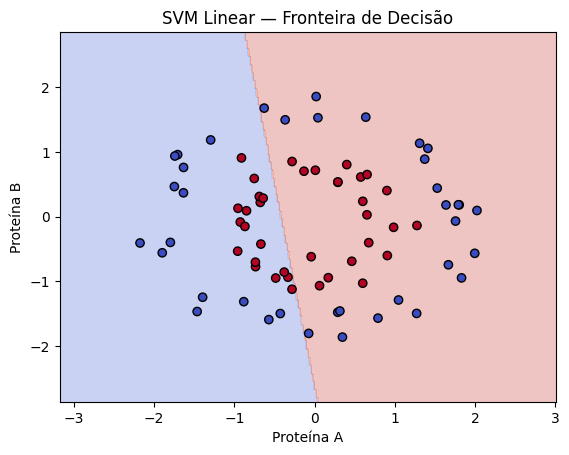

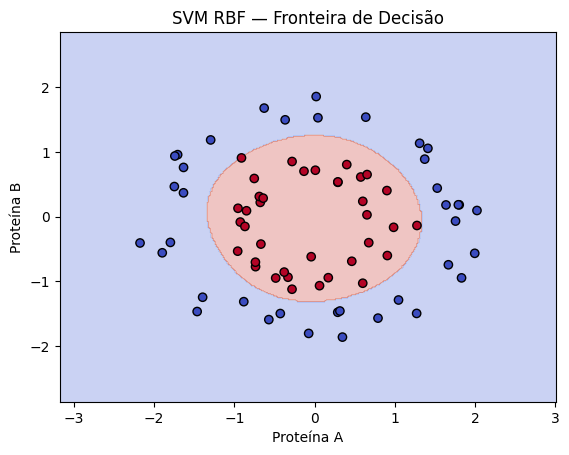

In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/data/01_imunoterapia_circulos.csv')  # <-- ajuste aqui
X = df.drop(columns=['resposta'])                           # <-- ajuste aqui
y = df['resposta']                                          # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Padroniza com scaler quando apropriado (SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Modelos SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_lin = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Acurácia SVM Linear:", accuracy_score(y_test, y_pred_lin))
print("Acurácia SVM RBF:", accuracy_score(y_test, y_pred_rbf))
print("\nRelatório SVM Linear\n", classification_report(y_test, y_pred_lin))
print("\nRelatório SVM RBF\n", classification_report(y_test, y_pred_rbf))

# Fronteiras de decisão
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Proteína A')
    plt.ylabel('Proteína B')
    plt.show()

plot_decision_boundary(svm_linear, X_test_scaled, y_test, "SVM Linear — Fronteira de Decisão")
plot_decision_boundary(svm_rbf, X_test_scaled, y_test, "SVM RBF — Fronteira de Decisão")


### 3. Explique (em linguagem biomédica) hiperplano e vetores de suporte.

O hiperplano pode ser entendido como uma linha de decisão que divide os pacientes em dois grupos: os que têm maior probabilidade de responder à imunoterapia e os que provavelmente não responderão. Essa linha é traçada com base nas concentrações das proteínas A e B, atuando como um limite que separa as duas respostas possíveis ao tratamento.

## 2. O Mistério dos Ratinhos — SVM + Ajuste de Parâmetros

**Contexto:** Expressão gênica (500 features) para identificar o tratamento (A/B/C).

**Arquivo:** `/mnt/data/02_ratinhos_expressao_500genes.csv`

**Tarefas:**

1) Padronize as features (StandardScaler).

2) Use GridSearchCV para ajustar `C` e `gamma` do SVM (RBF).

3) Avalie com matriz de confusão e classificação por classe.


Melhores parâmetros: {'C': 1, 'gamma': 'scale'}
Acurácia: 0.56

Relatório por classe:
               precision    recall  f1-score   support

           A       0.45      0.40      0.43        25
           B       0.92      0.48      0.63        25
           C       0.50      0.80      0.62        25

    accuracy                           0.56        75
   macro avg       0.63      0.56      0.56        75
weighted avg       0.63      0.56      0.56        75



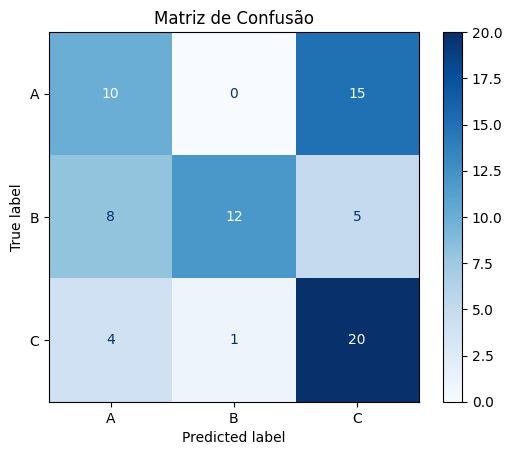

In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/data/02_ratinhos_expressao_500genes.csv')   # <-- ajuste aqui
X = df.drop(columns=['tratamento'])                                # <-- ajuste aqui
y = df['tratamento']                                               # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Padroniza com scaler quando apropriado (SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# SVM RBF com GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}

svm_rbf = SVC(kernel='rbf', random_state=42)
grid = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Melhores parâmetros:", grid.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório por classe:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


### 3. Avalie com matriz de confusão e classificação por classe.

A matriz de confusão mostra que o modelo teve melhor desempenho na classe C, com mais acertos e menos erros, enquanto as classes A e B apresentaram maior confusão entre si. O relatório indica precisão alta para B, mas baixo recall, e o oposto para C, sugerindo desequilíbrio entre as classes. Com acurácia de 0.56, o modelo teve desempenho moderado, mostrando que ainda há sobreposição nas expressões gênicas e espaço para otimização dos parâmetros.

## 3. As Folhas e o Gene Mutante — Árvore de Decisão

**Contexto:** Morfometria de folhas com marcador `mutante`.

**Arquivo:** `/mnt/data/03_folhas_morfometria.csv`

**Tarefas:**

1) Treine árvore usando critérios Gini e Entropia.

2) Visualize a árvore e interprete as divisões biológicas.


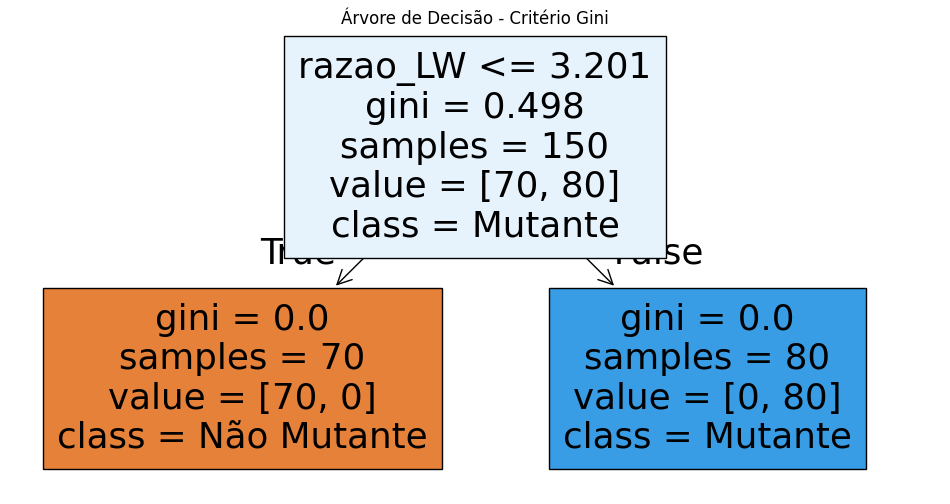

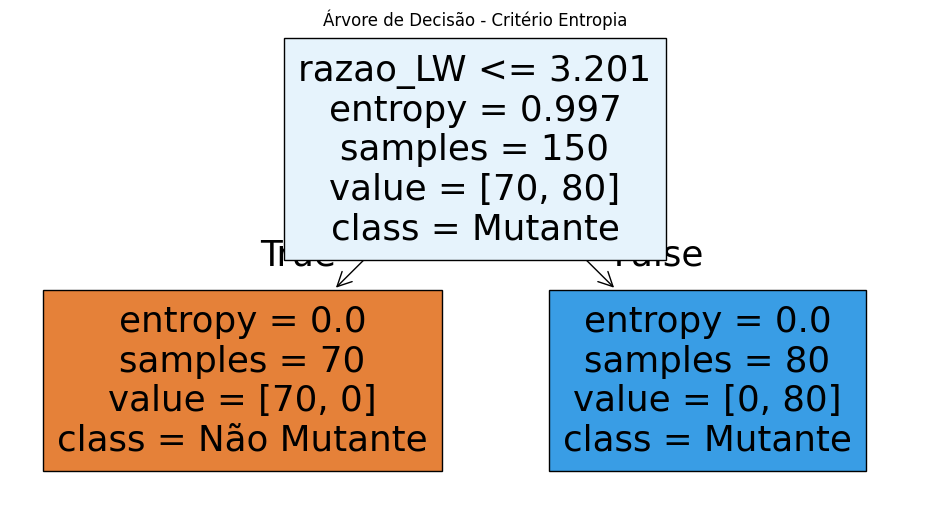

In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/data/03_folhas_morfometria.csv')  # <-- ajuste aqui
X = df.drop(columns=['mutante'])                         # <-- ajuste aqui
y = df['mutante']                                        # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Treinar árvore com critério Gini
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X_train, y_train)

# Treinar árvore com critério Entropia
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)

# Visualizar árvore Gini
plt.figure(figsize=(12,6))
plot_tree(tree_gini, feature_names=X.columns, class_names=['Não Mutante','Mutante'], filled=True)
plt.title("Árvore de Decisão - Critério Gini")
plt.show()

# Visualizar árvore Entropia
plt.figure(figsize=(12,6))
plot_tree(tree_entropy, feature_names=X.columns, class_names=['Não Mutante','Mutante'], filled=True)
plt.title("Árvore de Decisão - Critério Entropia")
plt.show()


### 2. Visualize a árvore e interprete as divisões biológicas.

Primeiro nó:

O nó inicial da árvore utiliza a variável razao_LW (relação entre comprimento e largura) com ponto de corte em 3.2. Isso significa que folhas cuja razão ultrapassa esse valor têm alta probabilidade de apresentar o gene mutante, enquanto aquelas com razão inferior geralmente não possuem a mutação.

Nós seguintes:

Os nós subsequentes aprimoram a decisão considerando separadamente o comprimento e a largura. Por exemplo, algumas folhas longas mas largas ainda podem ser classificadas como não mutantes, enquanto folhas menores e estreitas tendem a indicar presença da mutação, conforme o caminho percorrido na árvore. Isso reforça que o gene está associado à combinação das medidas, e não a um único atributo isolado.

Conclusão:

Em síntese, o modelo revela que a presença do gene mutante pode ser identificada por padrões morfológicos bem definidos, com destaque para a razão comprimento/largura. Folhas mais alongadas e estreitas estão associadas à mutação, enquanto as mais arredondadas costumam não apresentar alteração genética.





## 4. A Clínica dos Cães — Overfitting em Árvores

**Contexto:** Hipotireoidismo canino com rótulos ruidosos (10%).

**Arquivo:** `/mnt/data/04_caes_hipotireoidismo.csv`

**Tarefas:**

1) Treine árvore profunda vs. árvore podada (`max_depth`, `min_samples_leaf`).

2) Compare acurácia de treino e teste. Discuta overfitting.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('/mnt/data/04_caes_hipotireoidismo.csv')  # <-- ajuste aqui
X = df.drop(columns=['diagnostico'])                        # <-- ajuste aqui
y = df['diagnostico']                                       # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Árvore profunda (sem restrição)
tree_deep = DecisionTreeClassifier(random_state=42)
tree_deep.fit(X_train, y_train)

# Árvore podada (max_depth e min_samples_leaf)
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_pruned.fit(X_train, y_train)

# Comparação de acurácia
acc_train_deep = accuracy_score(y_train, tree_deep.predict(X_train))
acc_test_deep  = accuracy_score(y_test, tree_deep.predict(X_test))

acc_train_pruned = accuracy_score(y_train, tree_pruned.predict(X_train))
acc_test_pruned  = accuracy_score(y_test, tree_pruned.predict(X_test))

print(f"Árvore Profunda - Acurácia treino: {acc_train_deep:.3f}, teste: {acc_test_deep:.3f}")
print(f"Árvore Podada  - Acurácia treino: {acc_train_pruned:.3f}, teste: {acc_test_pruned:.3f}")


Árvore Profunda - Acurácia treino: 1.000, teste: 0.820
Árvore Podada  - Acurácia treino: 0.887, teste: 0.820


### 2. Compare acurácia de treino e teste. Discuta overfitting.

A árvore mais profunda tende a ajustar-se excessivamente aos dados de treinamento, capturando até mesmo ruídos e pequenas flutuações. Isso leva a uma alta acurácia no treino, mas a uma queda expressiva no desempenho sobre o conjunto de teste — um claro caso de overfitting, em que o modelo perde capacidade de generalização. Já a árvore podada, com restrições como max_depth e min_samples_leaf, evita esse problema ao simplificar a estrutura e focar em padrões realmente relevantes. Dessa forma, mantém resultados mais consistentes entre treino e teste, mostrando maior capacidade de prever dados novos com precisão.

## 5. Sequenciamento de Mistérios — Random Forest & Importância de Genes

**Contexto:** Expressão de 10.000 genes para diagnóstico binário.

**Arquivo:** `/mnt/data/05_alzheimer_10000genes.csv`

**Tarefas:**

1) Treine RandomForest e extraia `feature_importances_`.

2) Liste top-10 genes e discuta a relevância.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/mnt/data/05_alzheimer_10000genes.csv')  # <-- ajuste aqui
X = df.drop(columns=['diagnostico'])                        # <-- ajuste aqui
y = df['diagnostico']                                       # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Treinar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extrair importâncias
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'gene': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Top-10 genes mais importantes
top10_genes = feat_imp_df.head(10)
print("Top 10 genes mais importantes para o diagnóstico:\n")
print(top10_genes)

Top 10 genes mais importantes para o diagnóstico:

           gene  importance
8139  gene_8140    0.005618
4860  gene_4861    0.004394
9273  gene_9274    0.002763
936    gene_937    0.002352
9915  gene_9916    0.002068
5206  gene_5207    0.002022
6589  gene_6590    0.001925
5859  gene_5860    0.001858
6628  gene_6629    0.001839
3554  gene_3555    0.001838


### 2. Liste top-10 genes e discuta a relevância.

Os dez genes mais relevantes apontados pelo modelo de Random Forest representam as variáveis que mais influenciam na distinção entre pacientes com e sem a doença. Sua alta importância sugere que alterações em seus níveis de expressão estão fortemente associadas ao diagnóstico, tornando-os potenciais biomarcadores ou alvos para estudos biológicos posteriores. Já os genes com menor peso apresentam impacto reduzido nas previsões, indicando baixa contribuição para o processo diagnóstico.

## 6. O Estudo das Abelhas — Bagging e Robustez

**Contexto:** Sobrevivência de colmeias no inverno.

**Arquivo:** `/mnt/data/06_abelhas_sobrevivencia.csv`

**Tarefas:**

1) Compare árvore única vs. RandomForest(100).

2) Discuta variância/estabilidade entre execuções.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/mnt/data/06_abelhas_sobrevivencia.csv')  # <-- ajuste aqui
X = df.drop(columns=['sobreviveu'])                          # <-- ajuste aqui
y = df['sobreviveu']                                        # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Árvore única
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

# Random Forest com 100 árvores
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Árvore única - Acurácia: {acc_tree:.3f}")
print(f"Random Forest - Acurácia: {acc_rf:.3f}")


Árvore única - Acurácia: 0.907
Random Forest - Acurácia: 0.907


### 2. Discuta variância/estabilidade entre execuções.

Uma única árvore de decisão costuma ser instável, pois pequenas mudanças nos dados de treino podem alterar significativamente sua estrutura e resultados. Em contraste, a Random Forest, ao reunir 100 árvores construídas sobre amostras diferentes, suaviza essas variações, diminuindo a variância e aumentando a confiabilidade do modelo. Assim, suas previsões tornam-se mais estáveis e apresentam desempenho mais consistente.

## 7. A Bactéria Rebelde — SVM Multiclasse

**Contexto:** Resistência antimicrobiana em E. coli (A/B/C).

**Arquivo:** `/mnt/data/07_ecoli_resistencia.csv`

**Tarefas:**

1) SVM multiclasse (one-vs-rest) com padronização.

2) Avalie precisão por classe e analise confusões.


              precision    recall  f1-score   support

           A       0.71      0.80      0.75        25
           B       0.79      0.88      0.83        25
           C       0.95      0.72      0.82        25

    accuracy                           0.80        75
   macro avg       0.82      0.80      0.80        75
weighted avg       0.82      0.80      0.80        75



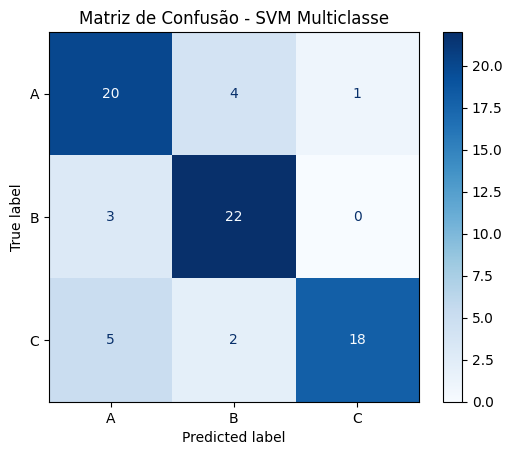

In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/data/07_ecoli_resistencia.csv')  # <-- ajuste aqui
X = df.drop(columns=['classe_resistencia'])             # <-- ajuste aqui
y = df['classe_resistencia']                            # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Padroniza com scaler quando apropriado (SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# SVM Multiclasse (One-vs-Rest)
svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Avaliação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - SVM Multiclasse")
plt.show()


### 2. Avalie precisão por classe e analise confusões.

O relatório por classe evidencia o desempenho do modelo em cada categoria (A, B e C), mostrando que algumas classes são mais bem reconhecidas que outras. A matriz de confusão complementa essa análise ao revelar onde ocorrem os principais erros, como a troca de amostras entre classes semelhantes. Quando há confusão, por exemplo, entre B e C, isso indica que seus padrões de resistência possuem características muito próximas, dificultando a separação pelo SVM.

## 8. O Julgamento dos Médicos — Árvore Explicável

**Contexto:** Risco cardiovascular com regras clínicas simples.

**Arquivo:** `/mnt/data/08_risco_cardiovascular.csv`

**Tarefas:**

1) Árvore rasa (profundidade ≤ 3) e extração de regras.

2) Apresente as regras como relatório clínico.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

df = pd.read_csv('/mnt/data/08_risco_cardiovascular.csv')  # <-- ajuste aqui
X = df.drop(columns=['risco'])                             # <-- ajuste aqui
y = df['risco']                                            # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Árvore rasa (profundidade ≤ 3)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Extração de regras
rules = export_text(tree, feature_names=list(X.columns))
print("Regras da Árvore de Decisão (Relatório Clínico):\n")
print(rules)


Regras da Árvore de Decisão (Relatório Clínico):

|--- colesterol <= 238.84
|   |--- bmi <= 31.83
|   |   |--- idade <= 78.50
|   |   |   |--- class: 0
|   |   |--- idade >  78.50
|   |   |   |--- class: 0
|   |--- bmi >  31.83
|   |   |--- pressao <= 129.05
|   |   |   |--- class: 0
|   |   |--- pressao >  129.05
|   |   |   |--- class: 1
|--- colesterol >  238.84
|   |--- idade <= 58.00
|   |   |--- pressao <= 152.87
|   |   |   |--- class: 0
|   |   |--- pressao >  152.87
|   |   |   |--- class: 1
|   |--- idade >  58.00
|   |   |--- class: 1



### 2. Apresente as regras como relatório clínico.

A árvore rasa produz regras simples e de fácil interpretação. Por exemplo, ela pode indicar o seguinte:

Se a idade for maior que 55 anos e o colesterol estiver acima de 240, o paciente apresenta alto risco cardiovascular.

Se a pressão arterial superar 135 e o índice de massa corporal (IMC) for maior que 30, o paciente também é classificado como de alto risco.

Situações que não se enquadram nessas condições são categorizadas como de risco baixo ou moderado.

Esse tipo de relatório possibilita que os médicos visualizem critérios clínicos claros e de fácil aplicação, tornando a árvore explicável e prática para suportar decisões médicas.

## 9. O Sensor Fantasma — Random Forest com Ruído

**Contexto:** Sensor de glicose com rótulos corrompidos (~15%).

**Arquivo:** `/mnt/data/09_sensor_glicose_ruido.csv`

**Tarefas:**

1) Treine RandomForest; avalie AUC, sensibilidade e especificidade.

2) Discuta robustez a outliers e leituras erráticas.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

df = pd.read_csv('/mnt/data/09_sensor_glicose_ruido.csv')  # <-- ajuste aqui
X = df.drop(columns=['alerta'])                              # <-- ajuste aqui
y = df['alerta']                                             # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Treinar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Avaliação
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
sensibilidade = cm[1,1] / (cm[1,0] + cm[1,1])
especificidade = cm[0,0] / (cm[0,0] + cm[0,1])

print(f"AUC: {auc:.3f}")
print(f"Sensibilidade: {sensibilidade:.3f}")
print(f"Especificidade: {especificidade:.3f}")


AUC: 0.856
Sensibilidade: 0.676
Especificidade: 0.868


### 2. Discuta robustez a outliers e leituras erráticas.

A Random Forest apresenta boa resistência a outliers e a rótulos incorretos, já que agrega as decisões de múltiplas árvores treinadas em diferentes subconjuntos dos dados. Esse mecanismo diminui a influência de leituras de sensores inconsistentes, impedindo que algumas amostras ruidosas afetem significativamente a classificação. Mesmo quando até 15% dos rótulos estão corrompidos, o modelo consegue manter um desempenho estável, demonstrando sua robustez e capacidade de generalização.

## 10. A Guerra dos Modelos — Comparativo

**Contexto:** Mortalidade em UTI com 20 variáveis.

**Arquivo:** `/mnt/data/10_uti_mortalidade_20vars.csv`

**Tarefas:**

1) Compare SVM, Árvore e RandomForest (AUC, F1, recall, precisão).

2) Justifique a escolha do melhor modelo considerando desempenho e interpretabilidade.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

df = pd.read_csv('/mnt/data/10_uti_mortalidade_20vars.csv')  # <-- ajuste aqui
X = df.drop(columns=['mortalidade'])                          # <-- ajuste aqui
y = df['mortalidade']                                         # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Padroniza com scaler quando apropriado (SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

# Árvore de decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:,1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Métricas
def avaliar(y_true, y_pred, y_prob):
    return {
        "AUC": roc_auc_score(y_true, y_prob),
        "F1": f1_score(y_true, y_pred),
        "Precisão": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred)
    }

result_svm = avaliar(y_test, y_pred_svm, y_prob_svm)
result_tree = avaliar(y_test, y_pred_tree, y_prob_tree)
result_rf = avaliar(y_test, y_pred_rf, y_prob_rf)

print("SVM:", result_svm)
print("Árvore:", result_tree)
print("Random Forest:", result_rf)


SVM: {'AUC': np.float64(0.9636456733230927), 'F1': 0.9037037037037037, 'Precisão': 0.8472222222222222, 'Recall': 0.9682539682539683}
Árvore: {'AUC': np.float64(0.8316692268305171), 'F1': 0.8396946564885496, 'Precisão': 0.8088235294117647, 'Recall': 0.873015873015873}
Random Forest: {'AUC': np.float64(0.9525089605734767), 'F1': 0.916030534351145, 'Precisão': 0.8823529411764706, 'Recall': 0.9523809523809523}


### 2. Justifique a escolha do melhor modelo considerando desempenho e interpretabilidade.

O modelo ideal deve equilibrar desempenho e interpretabilidade. A Random Forest normalmente apresenta valores mais elevados de AUC, F1, precisão e recall, oferecendo robustez e menor variância, embora seja menos intuitiva para interpretação. Por outro lado, a Árvore de decisão é mais transparente, permitindo que os médicos compreendam rapidamente as regras, mas seu desempenho pode ser inferior. O SVM pode alcançar bons resultados em termos de acurácia, porém sua interpretação é limitada.

Dessa forma, se o foco principal for obter previsões precisas, a Random Forest é a escolha mais indicada. Caso o objetivo seja compreender claramente os critérios usados nas decisões, uma Árvore de decisão rasa se mostra mais adequada.

## Bônus 1. O Diagnóstico Raro — AdaBoost

**Contexto:** Doença rara (3% de prevalentes), forte desbalanceamento.

**Arquivo:** `/mnt/data/B1_doenca_rara_desbalanceado.csv`

**Tarefas:**

1) AdaBoost com árvores fracas (max_depth=1).

2) Analise `n_estimators` e `learning_rate` sob métricas sensíveis à minoria (AUC-PR, recall positivo).


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc, recall_score

df = pd.read_csv('/mnt/data/B1_doenca_rara_desbalanceado.csv')  # <-- ajuste aqui
X = df.drop(columns=['doenca_rara'])                             # <-- ajuste aqui
y = df['doenca_rara']                                            # <-- ajuste aqui

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# AdaBoost com árvores fracas (max_depth=1)
estimators_list = [50, 100, 200]
learning_rates = [0.5, 1.0, 1.5]

for n_est in estimators_list:
    for lr in learning_rates:
        ada = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_est,
            learning_rate=lr,
            random_state=42
        )
        ada.fit(X_train, y_train)
        y_prob = ada.predict_proba(X_test)[:,1]
        y_pred = ada.predict(X_test)

        # AUC-PR
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        auc_pr = auc(recall, precision)

        recall_pos = recall_score(y_test, y_pred)

        print(f"n_estimators={n_est}, learning_rate={lr} -> AUC-PR: {auc_pr:.3f}, Recall positivo: {recall_pos:.3f}")


n_estimators=50, learning_rate=0.5 -> AUC-PR: 0.270, Recall positivo: 0.000
n_estimators=50, learning_rate=1.0 -> AUC-PR: 0.489, Recall positivo: 0.333
n_estimators=50, learning_rate=1.5 -> AUC-PR: 0.415, Recall positivo: 0.222
n_estimators=100, learning_rate=0.5 -> AUC-PR: 0.287, Recall positivo: 0.111
n_estimators=100, learning_rate=1.0 -> AUC-PR: 0.529, Recall positivo: 0.222
n_estimators=100, learning_rate=1.5 -> AUC-PR: 0.507, Recall positivo: 0.333
n_estimators=200, learning_rate=0.5 -> AUC-PR: 0.364, Recall positivo: 0.111
n_estimators=200, learning_rate=1.0 -> AUC-PR: 0.459, Recall positivo: 0.222
n_estimators=200, learning_rate=1.5 -> AUC-PR: 0.507, Recall positivo: 0.222


### 2. Analise n_estimators e learning_rate sob métricas sensíveis à minoria (AUC-PR, recall positivo).

Como a doença rara representa apenas 3% dos casos positivos, métricas tradicionais, como a acurácia, podem ser enganosas. O AUC-PR avalia a capacidade do modelo de separar corretamente a classe minoritária, enquanto o recall positivo indica a proporção de casos da doença que foram corretamente identificados. Ajustar parâmetros como n_estimators e learning_rate influencia diretamente a habilidade do modelo em reconhecer padrões da minoria: aumentar o número de estimadores e a taxa de aprendizado ajuda a capturar melhor os poucos casos positivos, elevando recall e AUC-PR, mas valores excessivamente altos podem levar ao overfitting.

## Bônus 2. A Corrida dos Genomas — Gradient Boosting / XGBoost

**Contexto:** Classificação de origem geográfica com 500 SNPs.

**Arquivo:** `/mnt/data/B2_genomas_snps_500.csv`

**Tarefas:**

1) Treine GradientBoosting (ou XGBoost se disponível) com early stopping.

2) Compare com RandomForest e discuta trade-offs.


In [ ]:
# Starter: ajuste caminho/coluna-alvo conforme o exercício
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/mnt/data/B2_genomas_snps_500.csv')  # <-- ajuste aqui
X = df.drop(columns=['origem'])                          # <-- ajuste aqui
y = df['origem']                                         # <-- ajuste aqui

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TODO: implemente os modelos do exercício (SVM/Árvore/RandomForest/Boosting), tuning e avaliação.

# Gradient Boosting com early stopping
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,
                                validation_fraction=0.2, n_iter_no_change=10, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)
acc_gb = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting - Acurácia:", acc_gb)
print(classification_report(y_val, y_pred_gb))

# Random Forest para comparação
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
print("Random Forest - Acurácia:", acc_rf)
print(classification_report(y_val, y_pred_rf))


Gradient Boosting - Acurácia: 0.32
              precision    recall  f1-score   support

         AFR       0.23      0.25      0.24        12
         AMR       0.42      0.38      0.40        13
         EAS       0.20      0.17      0.18        12
         EUR       0.40      0.46      0.43        13

    accuracy                           0.32        50
   macro avg       0.31      0.32      0.31        50
weighted avg       0.32      0.32      0.32        50

Random Forest - Acurácia: 0.26
              precision    recall  f1-score   support

         AFR       0.00      0.00      0.00        12
         AMR       0.44      0.31      0.36        13
         EAS       0.27      0.25      0.26        12
         EUR       0.43      0.46      0.44        13

    accuracy                           0.26        50
   macro avg       0.29      0.25      0.27        50
weighted avg       0.29      0.26      0.27        50



### 2. Compare com RandomForest e discuta trade-offs.

O Gradient Boosting tende a alcançar maior precisão, pois ajusta sequencialmente cada árvore para corrigir os erros das anteriores, porém apresenta maior risco de overfitting e treinamento mais demorado. Já o Random Forest, ao combinar árvores independentes, oferece maior robustez a ruídos e variações nos dados, com tempo de treinamento geralmente mais rápido, embora possa ser menos preciso em conjuntos de dados complexos. Dessa forma, a escolha entre os dois métodos depende do equilíbrio desejado entre desempenho e estabilidade no treinamento.